In [1]:
import numpy as np
import pandas as pd
data1 = pd.read_table(r"D:\MyDataAnalysis\MyPandas\nasa.txt")

In [2]:
data1.shape

(8583, 21)

In [35]:
data1.head(2)

,会员ID,姓名,性别,年龄,身高,学历,婚否,所在地,星座,职业,...,愿意/可能前往,服务收费/支付能力,伴游经验,服务内容/需求服务,伴游心情/其他说明,最方便联系时间,联系电话,Email,博客,QQ
0,127740,1小姐,女,22,166,本科,未婚,合肥,山羊座,编辑,...,"安徽,浙江,江苏,上海",面议元/天,初次接触,"商务伴游,私人伴游,交友伴游,景点伴游",本人今年22岁，半年前大学毕业，平时在上海工作，放假时回安徽。有意可以联系我哦。另外我是大叔...,0:00—23:00,15755106787,1718560307@qq.com,http://www.banyou.com/,1718560307
1,88548,n小姐,女,22,162,本科,未婚,合肥,山羊座,在校学生,...,"安徽,合肥",面议元/天,初次接触,私人伴游,希望游客素质比较好，相互尊重，出言不逊者请勿扰。比较好奇，没试过。通过连接看到的，所以就注册...,8:00—23:00,未认证暂不开放或已设置成永久保密,2574230157@qq.com,http://www.banyou.com/,2574230157


In [3]:
data1["身高"].value_counts()  # 计次

166    2219
165     908
160     848
163     622
168     621
170     558
162     534
164     407
167     321
158     237
161     231
169     171
172     161
155     100
171      86
173      77
156      69
175      68
157      66
159      55
174      37
身高       30
150      24
176      24
180      17
178      14
152      11
153      10
177      10
154       8
181       8
185       5
151       5
200       4
179       4
190       2
186       2
199       2
183       2
189       1
193       1
182       1
187       1
195       1
Name: 身高, dtype: int64

In [37]:
def strFloat(tallstr):
    try:
        return float(tallstr)
    except:
        return np.nan

In [38]:
data1["身高"] = data1["身高"].map(strFloat)  # b遍历每个数据,对每个数做处理
data1["身高"].isnull().sum()  # 统计nan的个数

30

In [39]:
nanIndex = data1[data1["身高"].isnull()].index  # 返回哪一行为空

In [40]:
newdata = data1.drop(nanIndex)  # 过滤
newdata.shape

(8553, 21)

In [41]:
result = newdata.groupby("年龄")["身高"]  # 按年龄分组
# result.head()

In [42]:
def age_mean(group):
    if group.size < 100:  # 分组的大小
        return np.nan
    else:
        return group.mean()

In [43]:
lastresult = result.apply(age_mean)  # 分组后的数据只能用apply,不能用map
lastresult.isnull().sum()
lastresult.head(10)

年龄
18    165.087379
19    165.672083
20    165.266309
21    165.242826
22    164.815152
23    164.814229
24    164.810878
25    164.374016
26    163.788060
27    164.546939
Name: 身高, dtype: float64

In [4]:
data = pd.read_csv(r"D:\MyDataAnalysis\MyPandas\state-abbrevs.csv")

In [13]:
data.head(10)

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [17]:
# 计次
# data["abbreviation"].value_counts()

In [20]:
nasaAge = data1["年龄"].value_counts()

In [22]:
nasaAge[0:5]

21    1359
22    1320
20    1119
23    1012
24     809
Name: 年龄, dtype: int64

In [44]:
# 自动加载matplotlib
%matplotlib inline  

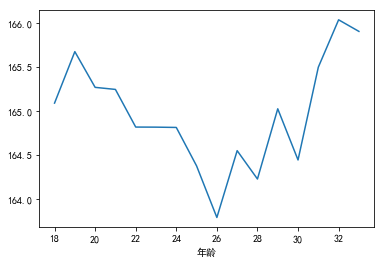

In [45]:
lastresult[0:20].plot()